
# <p style="text-align: center;">Sriram Ravula sr39533, Pranav Kavikondala pk6994</p>
# <p style="text-align: center;">EE 461P: Data Science Principles</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Tuesday, October 3rd, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group.  

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1: Ridge and Lasso Regression (15 points)
Use the following codes to import the diabetes dataset.

In [1]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

The dataset consists of ten features and one target variable.  More information is found at http://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

After importing the datasets, use the following code to add additional second-order polynomial and interaction variables to the features matrix.  You should have 65 variables and one target variable. Note that this code adds all combinations of the features with degree less than or equal to two; in practice one may introduce only a few based on domain knowledge or experimentation.

In [2]:
from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

In this question, you will explore the application of Lasso and Ridge regression using sklearn package in Python. The following code will split the data into training and test set using [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with **random state 20** and **test_size = 0.33**.  Note: lambda is called alpha in sklearn.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.33, random_state=20)

1) Use sklearn.linear_model.Lasso and sklearn.linear_model.Ridge classes to do a [5-fold cross validation](http://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#example-exercises-plot-cv-diabetes-py) using sklearn's [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold). For the sweep of the regularization parameter, we will look at a grid of values ranging from $\lambda = 10^{10}$ to $\lambda = 10^{-2}$. In Python, you can consider this range of values as follows:

      import numpy as np

      alphas =  10**np.linspace(10,-2,100)*0.5

  Report the best chosen $\lambda$ based on cross validation. The cross validation should happen on your training data using  average MSE as the scoring metric. (5pts)

2) Run ridge and lasso for all of the alphas specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; the plots for different features for a method should be on the same plot (e.g. Fig 6.6 of JW). What do you qualitatively observe when value of the regularization parameter is changed? (4pts)

3) Run least squares regression, ridge, and lasso on the training data. For ridge and lasso, use only the best regularization parameter. Report the prediction error (MSE) on the test data for each. (3pts)

4) Run lasso again with cross validation using [sklearn.linear_model.LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html). Set the cross validation parameters as follows:

    LassoCV(alphas=None, cv=10, max_iter=10000)

Report the best $\lambda$ based on cross validation. Run lasso on the training data using the best $\lambda$ and report the coefficeints for 65 variables. What do you observe from these coefficients? (3pts)

## Answer

### 1).  λ(Lasso) = 0.00873, λ(Ridge) = 0.005

In [4]:
import numpy as np


import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV



lasso = Lasso(random_state=0)
ridge=Ridge(random_state=0)

alphas =  10**np.linspace(10,-2,100)*0.5

tuned_parameters = [{'alpha': alphas}]
n_folds = 5

clfLasso = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clfLasso.fit(X_train, y_train)

clfRidge = GridSearchCV(ridge, tuned_parameters, cv=n_folds, refit=False, scoring = 'neg_mean_squared_error')
clfRidge.fit(X_train, y_train)


scoresLasso = clfLasso.cv_results_['mean_test_score']

scoresRidge = clfRidge.cv_results_['mean_test_score']

print(alphas[np.argmax(scoresLasso)]) #alpha
#print(np.argmax(scoresLasso)) #index of alpha
#print(scoresLasso[np.argmax(scoresLasso)]) #score at that alpha

print(alphas[np.argmax(scoresRidge)]) #alpha
#print(np.argmax(scoresRidge)) #index of alpha
#print(scoresRidge[np.argmax(scoresRidge)]) #score at that alpha

0.00873764200004
0.005


### 2). As the lambda/alpha increases, all of the weights are pushed toward 0 because higher coefficients are increasingly penalized.

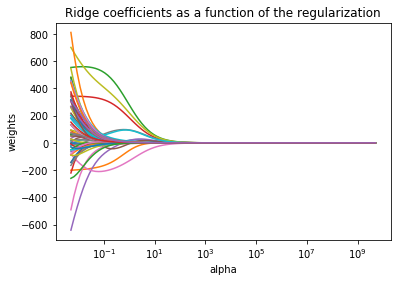

In [7]:
import numpy as np
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.linear_model import Ridge
 
 
 
alphas =  10**np.linspace(10,-2,100)*0.5
coefsR=[]
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=True)
    ridge.fit(X_train, y_train)
    coefsR.append(ridge.coef_)
   
   
ax = plt.gca()
 
ax.plot(alphas, coefsR)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

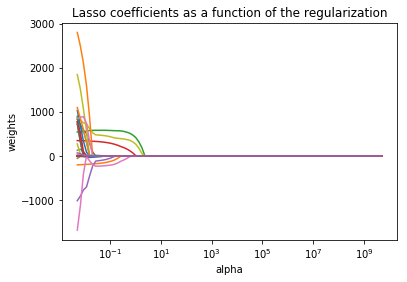

In [8]:
import numpy as np
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn import datasets
from sklearn.linear_model import Lasso
 
 
 
alphas =  10**np.linspace(10,-2,100)*0.5
coefsL=[]
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=True)
    lasso.fit(X_train, y_train)
    coefsL.append(lasso.coef_)
   
   
ax = plt.gca()
 
ax.plot(alphas, coefsL)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

### 3). MSE(Least Squares) = 3501.517, MSE(Lasso) = 2961.438, MSE(Ridge) = 2946.795

In [12]:
import numpy as np
%matplotlib inline
 
 
 
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
 
 
 
 
a=0.005
ridge = Ridge(alpha=a)
ridge.fit(X_train, y_train)
y_predict=ridge.predict(X_test)
print("Ridge error mean squared: " + str(mean_squared_error(y_test,y_predict)))

Ridge error mean squared: 2946.79477072


In [10]:
import numpy as np
%matplotlib inline
 
from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
 
 
 
 
a=0.008737642
lasso = Lasso(alpha=a)
lasso.fit(X_train, y_train)
y_predict=lasso.predict(X_test)
print("Lasso error mean squared: " + str(mean_squared_error(y_test,y_predict)))

Lasso error mean squared: 2961.43759012


In [11]:
import numpy as np
%matplotlib inline
 
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
 
 
 
 
linear = LinearRegression()
linear.fit(X_train, y_train)
y_predict=linear.predict(X_test)
print("Linear error mean squared: " + str(mean_squared_error(y_test,y_predict)))

Linear error mean squared: 3501.51672513


### 4). λ = 0.00642, Many of the coefficients are 0 indicating that the model does not think those corresponding features are vital

In [13]:
import numpy as np
%matplotlib inline
 
from sklearn import datasets
from sklearn.linear_model import LassoCV
 
 
 
np.set_printoptions(formatter={'float': lambda x: "{0:0.9f}".format(x)})
 
lassoCV =LassoCV(alphas=None, cv=10, max_iter=10000)
lassoCV.fit(X_train, y_train)
print(lassoCV.alpha_)
print(lassoCV.coef_)

0.00642100472994
[-6.410335048 -197.576959494 546.984637503 348.238822936 -920.201147167
 726.913837106 31.984625972 -14.809549286 817.158342163 5.940869806
 0.000000000 2527.811727446 0.000000000 0.000000000 0.000000000
 -0.000000000 0.000000000 0.000000000 1554.851418734 -0.000000000
 -0.000000000 0.000000000 496.504509431 0.000000000 0.000000000 0.000000000
 -1188.611689922 0.000000000 0.000000000 664.164437254 724.095065929
 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 875.450075119
 151.458509211 66.593846920 0.000000000 374.647619969 -0.000000000
 0.000000000 -0.000000000 0.000000000 0.000000000 0.000000000 -0.000000000
 0.000000000 0.000000000 -0.000000000 -0.000000000 -0.000000000
 546.680658672 0.000000000 369.983546819 -0.000000000 0.000000000
 0.000000000 -0.000000000 -0.000000000 875.268858330 -0.000000000
 0.000000000 54.676437801]


# Question 2  (5 pts)

A regression model that includes "interaction terms" (i.e. quadratic terms of the form $x_ix_j$) as predictors in addition to the linear terms is clearly more general than a corresponding model that employs the same independent variables but only uses the linear terms. Outline two situations where the simpler (less general) model would be preferred to the more powerful model that includes interactive terms.

## Answer



### 1 - If there is a strong colinearity between multiple features, there is a possibility that the more general model will amplify those colinearities. If the colinear features are multiplied together (i.e. Xi*Xj) and are given nonzero weights, then more columns of the feature matrix will be approximate linear combinations of each other, leading to dificulties or impossibilities in inverting it.

### 2 - The more general model has an increased risk of overfitting to the data. This is due to an increased reliance on the training data's feature set for target prediction.

# Question 3 - Bias-variance Trandeoff (2pts)
How does the choice of K in the K-nearest neighbor classifier reflect a bias-variance tradeoff?

## Answer

### By increasing K, bias is increased but variance is decreased. This is due to the fact that using an increasing number of neighbours will result in a more smoothed-out region with few "islands", meaning that the predicted output is more likely to be incorrect. At the same time, smoother regions and fewer islands means that predictions will be less varied for a given input.

# Question 4: Data Exploration and Regression Analysis (4+3+4+4=15pts)

Consider the dataset provided (russett_full_v2.csv) about agricultural inequality, industrial development and political instability in different countries. More information about it can be found [here](https://www.rdocumentation.org/packages/plspm/versions/0.4.9/topics/russett) though the data itself is slightly different than that referenced in the link.

a) (4 points) Generate box-plots of the "rent" (% of farmers that rent all their land) and "demo_score" ( derived measure of the level of a country's democracy from 1945 to 61 ) and identify the cutoff values for outliers. 

Generate 2 scatterplots of "rent" against "demo_score", and "inst" against "demo_score" with the identified outliers colored differently than non-outliers in each; comment on how inclusion of the outliers would affect a predictive model for the "demo_score" response.  

b) (3 points) Let us try to fit an MLR, using ordinary least squares, to this dataset with "demo_score" as the dependent variable using only the predictors 'rent','inst', and 'ecks' . 

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=10)   

Report the RMSE obtained on both X_train and X_test. How much does this increase when you score your model on X_test?

c) (4 points ) Try to predict ”demo_score” using a robust regression using Huber loss.  You can use the [sklearn package](  http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html).  Set regularization parameter alpha to 0.0 and all other parameters as default.
Report RMSE obtained on both X_train and X_test.

d) (4 points ) Compare and comment on the model fits obtained in (b) and (c) and plot the residual plots using all data for each model. How do outliers affect the relative performance of ordinary least squares regression, and robust regression with Huber loss in general? 

## Answers

### a). If the outliers were included in a predictive model, the curve would tend disproportionately toward those outliers in an effort to reduce MSE. The resulting model would not only be overfit to the training data, it would also give poor predictions for most inputs as it is highly influenced away from the general trend by a few outliers.

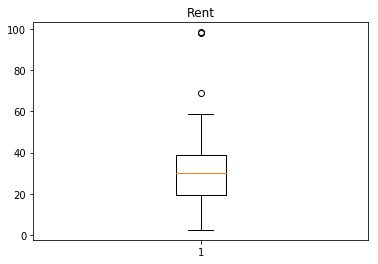

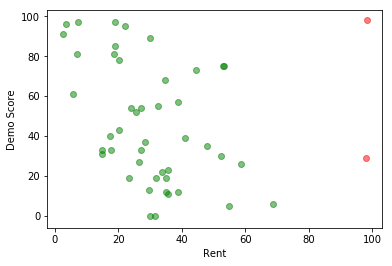

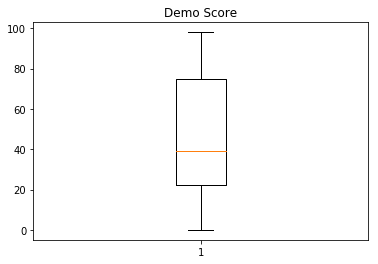

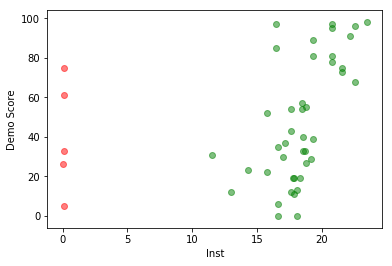

In [11]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#from scipy.stats import describe
import numpy as np
 
 
#boxplot for rent
russett = pd.read_csv('russett_full_v2.csv',sep=',')
plt.boxplot(russett['rent'])
p25=np.percentile(russett['rent'],25)
p75=np.percentile(russett['rent'],75)
high75=(p75-p25)*3+p75
low25=p25-(p75-p25)*3
#print(describe(russett['rent']))
plt.title('Rent')
plt.show()
 
#scatterplot for rent against demo score
plt.scatter(russett['rent'][(russett['rent']>=high75) | (russett['rent']<=low25)], russett['demo_score'][(russett['rent']>=high75) | (russett['rent']<=low25)], c='red', alpha=0.5)
plt.scatter(russett['rent'][(russett['rent']<high75) & (russett['rent']>low25)], russett['demo_score'][(russett['rent']<high75) & (russett['rent']>low25)], c='green', alpha=0.5)
plt.ylabel('Demo Score')
plt.xlabel('Rent')
plt.show()

 
#boxplot for demo score
plt.boxplot(russett['demo_score'])
plt.title('Demo Score')
plt.show()
p25=np.percentile(russett['demo_score'],25)
p75=np.percentile(russett['demo_score'],75)
high75=(p75-p25)*3+p75
low25=p25-(p75-p25)*3
#print(russett['demo_score'][(russett['demo_score']>=high75) | (russett['demo_score']<=low25)])
 
#scatterplot for inst against demo score
p25=np.percentile(russett['inst'],25)
p75=np.percentile(russett['inst'],75)
high75=(p75-p25)*3+p75
low25=p25-(p75-p25)*3
#print(russett['inst'][(russett['inst']>=high75) | (russett['inst']<=low25)])
 
plt.scatter(russett['inst'][(russett['inst']>=high75) | (russett['inst']<=low25)], russett['demo_score'][(russett['inst']>=high75) | (russett['inst']<=low25)], c='red', alpha=0.5)
plt.scatter(russett['inst'][(russett['inst']<high75) & (russett['inst']>low25)], russett['demo_score'][(russett['inst']<high75) & (russett['inst']>low25)], c='green', alpha=0.5)
plt.ylabel('Demo Score')
plt.xlabel('Inst')
plt.show()


### b). RMSE (train) = 25.559, RMSE (test) = 33.501. As expected, the test set RMSE is greater than the training set RMSE (by about 8). 

In [10]:
from sklearn.model_selection import train_test_split
 
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
russett = pd.read_csv('russett_full_v2.csv',sep=',')
 
X_train, X_test, y_train, y_test = train_test_split(russett[['rent','inst', 'ecks']],russett['demo_score'],test_size = 0.25, random_state=10)
 
 
reg=LinearRegression()
reg.fit(X_train,y_train)
y_train_predict=reg.predict(X_train)
y_test_predict=reg.predict(X_test)
 
rmsX_train = np.sqrt(mean_squared_error(y_train_predict, y_train))
 
rmsX_test = np.sqrt(mean_squared_error(y_test_predict, y_test))
 
 
print("RMSE train: " + str(rmsX_train))
print("RMSE test: " + str(rmsX_test))

RMSE train: 25.559001845
RMSE test: 33.5012518061


### c). RMSE (train) = 26.434, RSME (test) = 30.954

In [14]:
from sklearn.model_selection import train_test_split
 
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
 
russett = pd.read_csv('russett_full_v2.csv',sep=',')
 
X_train, X_test, y_train, y_test = train_test_split(russett[['rent','inst', 'ecks']],russett['demo_score'],test_size = 0.25, random_state=10)
 
reg=HuberRegressor(alpha=0)
reg.fit(X_train,y_train)
y_train_predict=reg.predict(X_train)
y_test_predict=reg.predict(X_test)
 
rmsX_train = np.sqrt(mean_squared_error(y_train_predict, y_train))
 
rmsX_test = np.sqrt(mean_squared_error(y_test_predict, y_test))
 
 
print("RMSE train: " + str(rmsX_train))
print("RMSE test: " + str(rmsX_test))

RMSE train: 26.4339055229
RMSE test: 30.9543526403


### d). In part b, we used a normal linear regression with MSE as our loss function. Models built with MSE are disproportionately affected by outliers, as their already high residuals have a squared effect on fitting the final model. This can cause the final model to shift away from the general trend in the data and toward the outliers. Huber loss on the other hand, uses a piecewise approach where points with smaller residuals (usually d = 1) contribute squared loss and points with larger residuals contribute linear loss. Because of this, the final model is not as highly affected by outliers. This difference is reflected in the test RMSE for both models; the model built with Huber loss has a lower test RMSE than the ordinary regression, indicating that the ordinary model might have been thrown off during training by the presence of outliers.

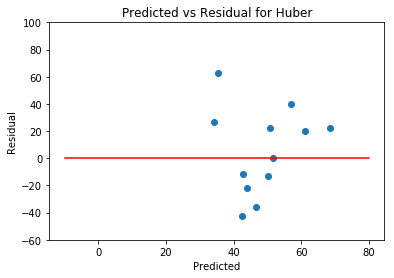

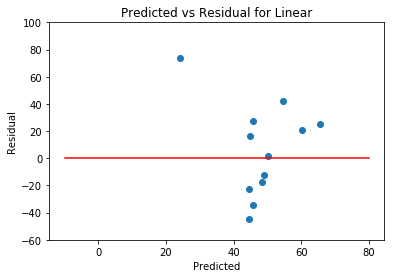

In [15]:
from sklearn.model_selection import train_test_split
 
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.metrics import mean_squared_error
 
russett = pd.read_csv('russett_full_v2.csv',sep=',')
X_train, X_test, y_train, y_test = train_test_split(russett[['rent','inst', 'ecks']],russett['demo_score'],test_size = 0.25, random_state=10)
 
regL=LinearRegression()
regL.fit(X_train,y_train)
y_test_predictL=regL.predict(X_test)
 
regH=HuberRegressor(alpha=0)
regH.fit(X_train,y_train)
y_test_predictH=regH.predict(X_test)
 
 
xlab='Predicted'
ylab='Residual'
 
 
plt.scatter(y_test_predictH,y_test-np.array(y_test_predictH))
plt.plot(np.linspace(-10,80,10),np.linspace(0,0,10), "r")
plt.ylim((-60,100))
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("Predicted vs Residual for Huber")
plt.show()
 
 
 
plt.scatter(y_test_predictL,y_test-np.array(y_test_predictL))
plt.plot(np.linspace(-10,80,10),np.linspace(0,0,10), "r")
plt.ylim((-60,100))
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title("Predicted vs Residual for Linear")
plt.show()

# Question 5 - Sampling (4+4=8pts)

1. NBC has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a “black and white age”). NBC wants to estimate what fraction p of its audience like the show by “randomly” calling n viewers and tallying their responses so as to estimate the true value of p to a fractional accuracy of within ±ε%, with a confidence of (1 − α) × 100%. For α = 0.10, ε = 0.03 (i.e. your answer will be $\hat{p}$± 0.03), what is the minimum value of n needed if true value (i) p = 0.5, (ii) p=0.25? 

2. Suppose for a certain value of p and choice of ε, you calculate that you will need 1000 samples for α = 0.02. You now decide to obtain a more accurate answer by either (i) reducing α to 0.01, keeping the same ε or by (ii) reducing ε by a factor of 2 from the original value, and increasing α to 0.05. In each case how many samples would you need now?

## Answer

### 1). n (p=0.5) = 752, n (p=0.25) = 564

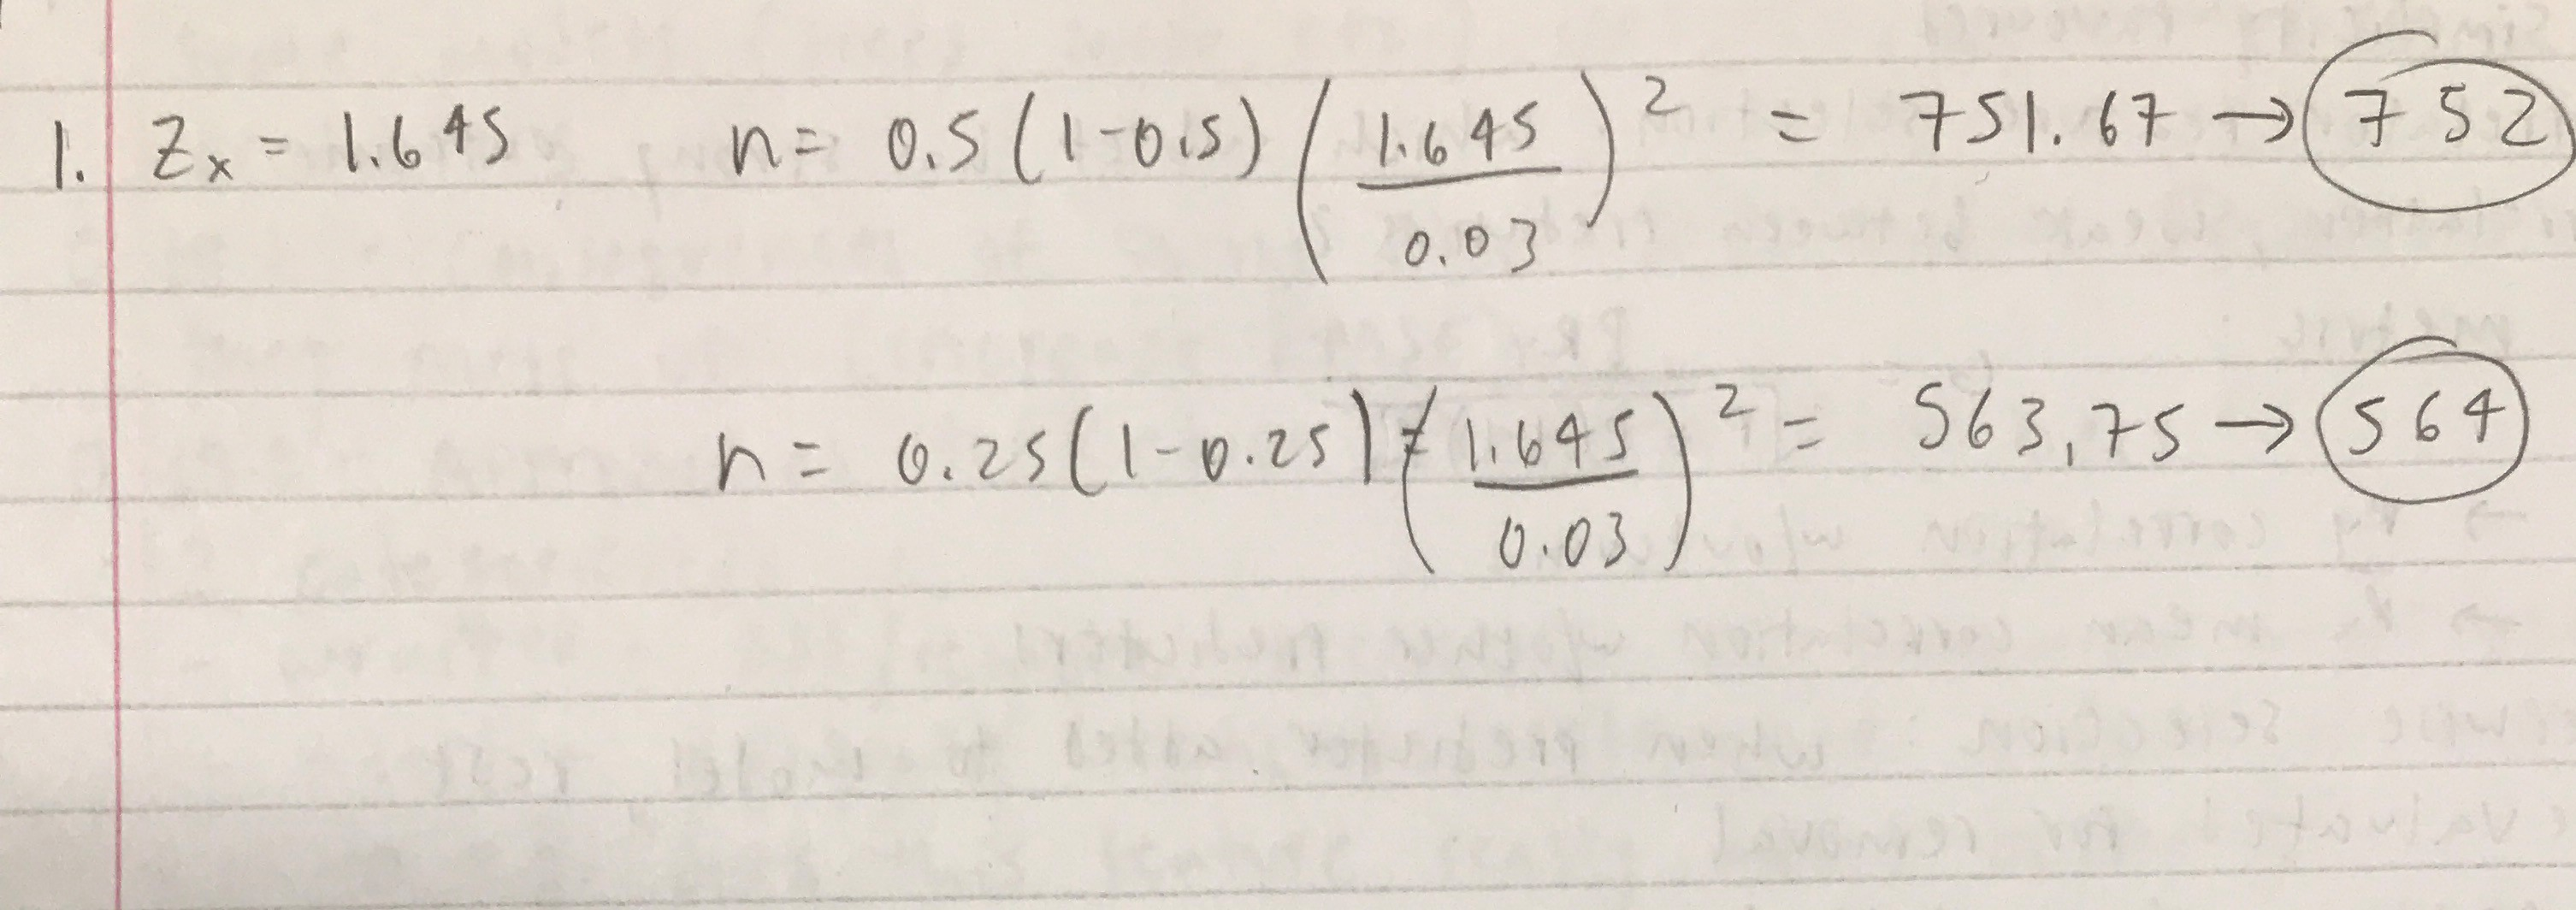

### 2). (i) n = 1227 (ii) n = 2840

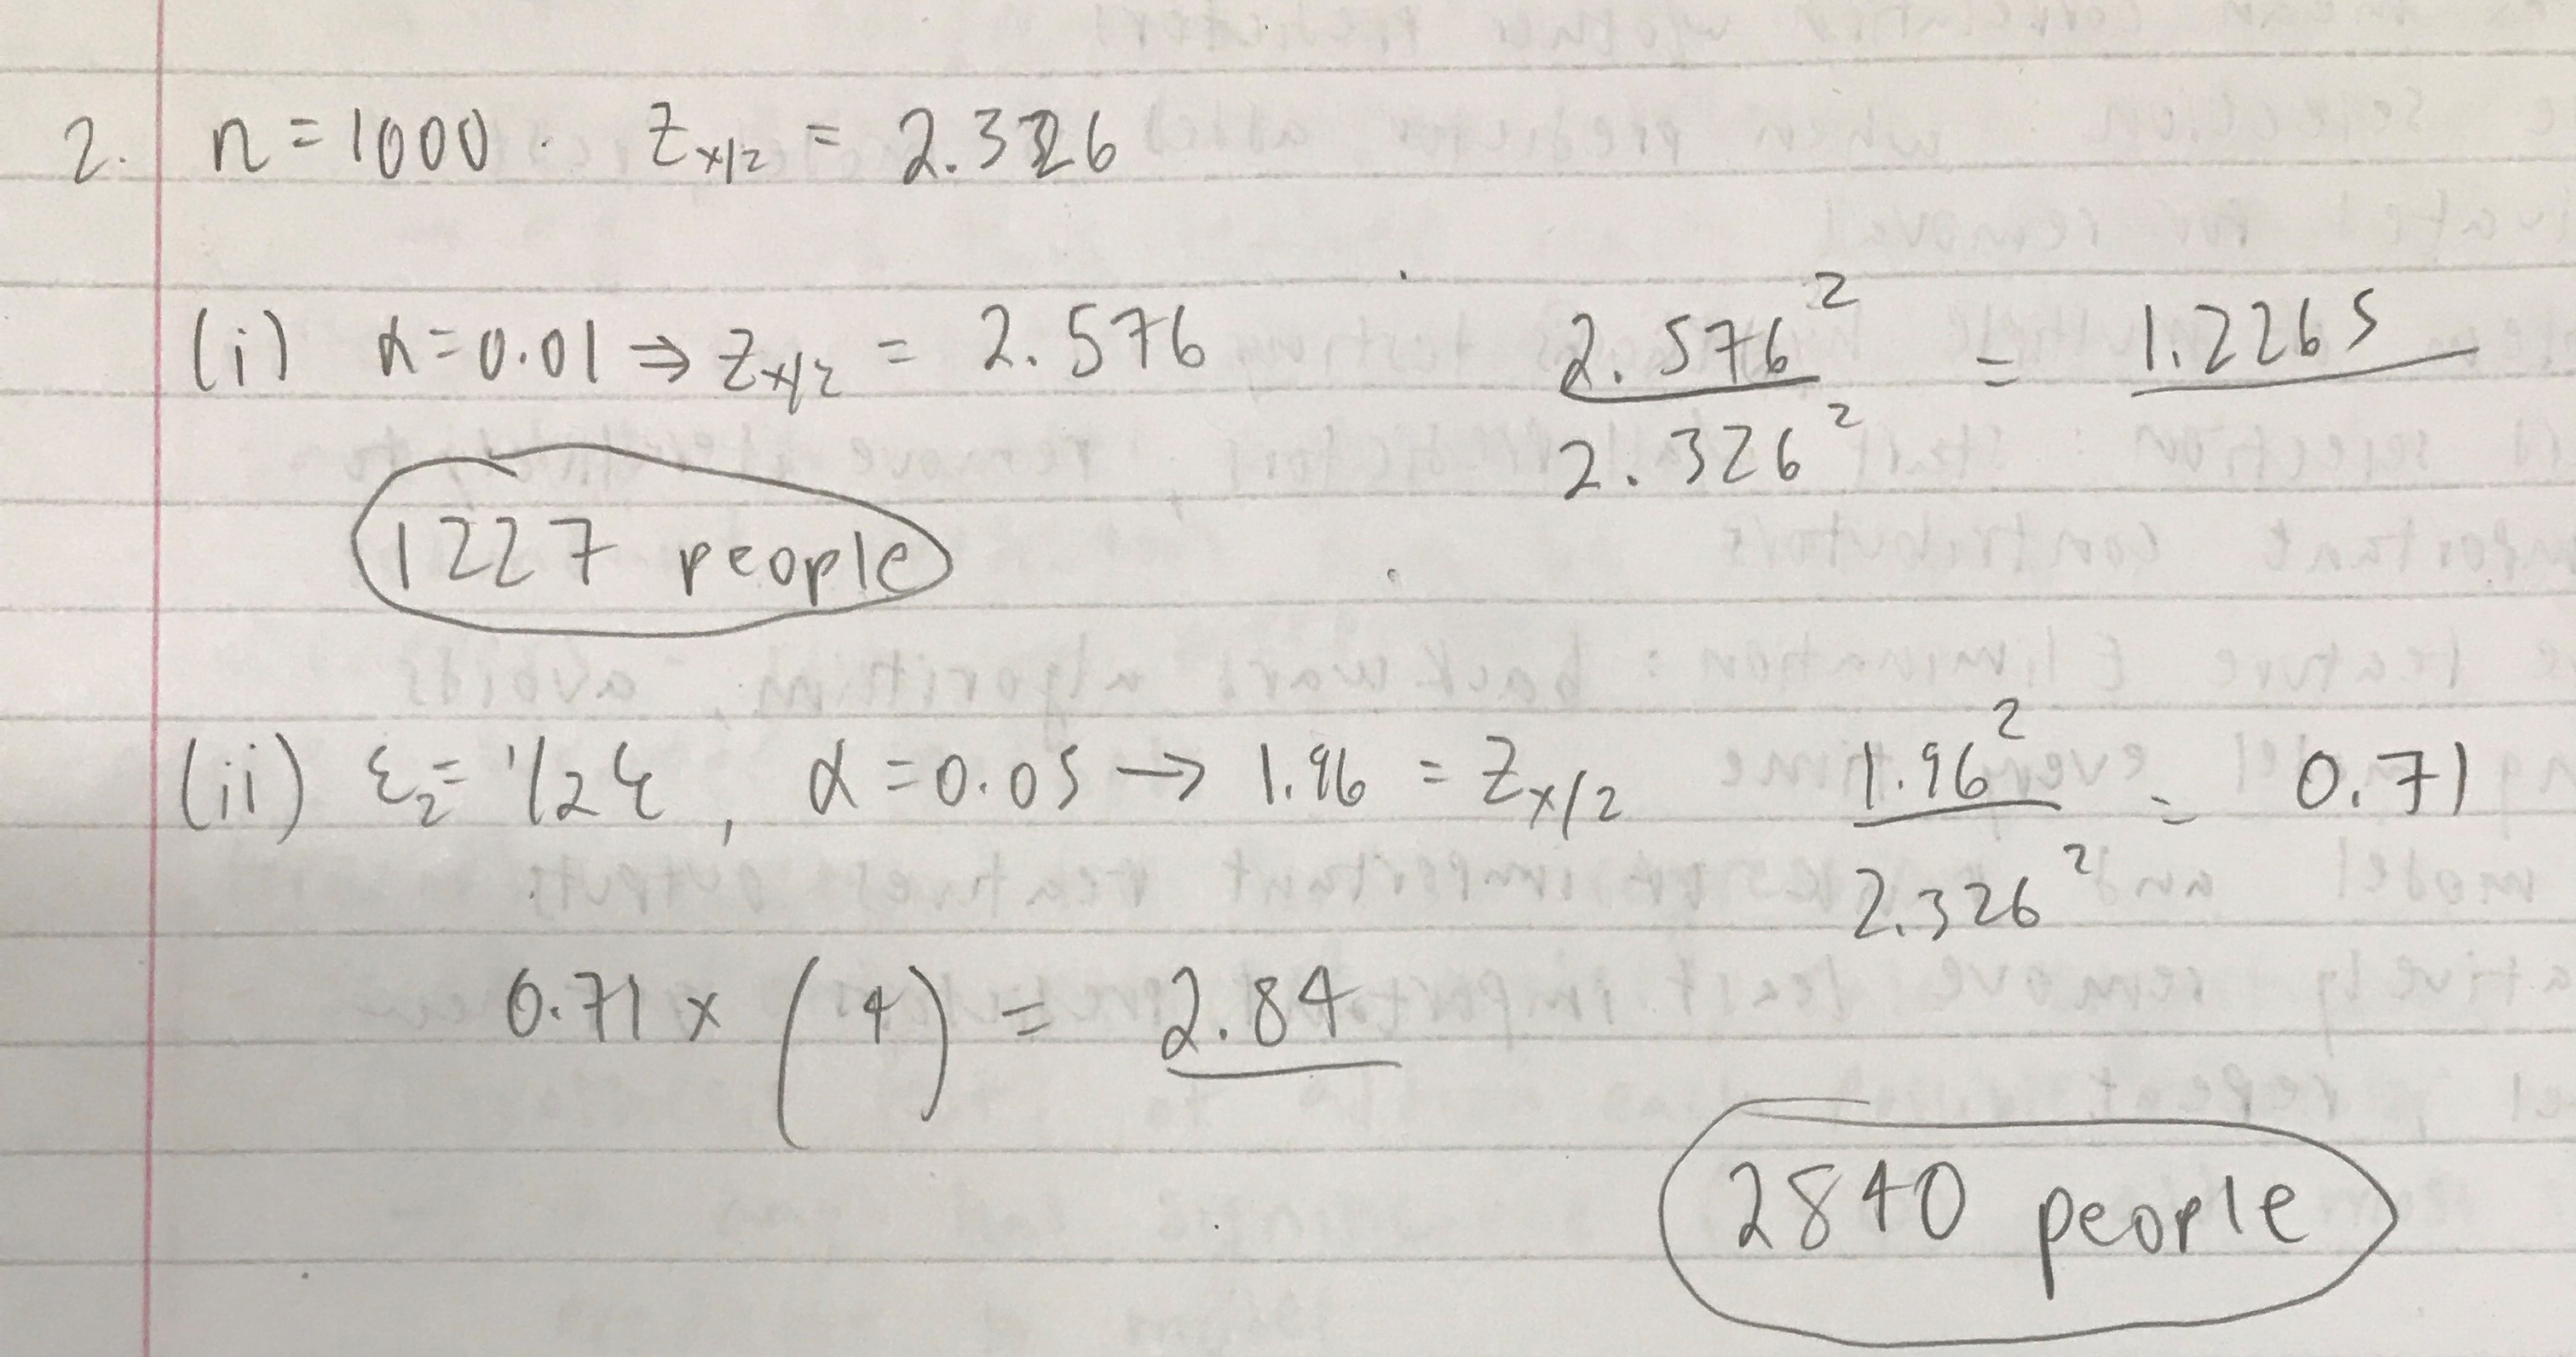

# Question 6 - Principal Component Analysis (10 points)

Import the diabetes dataset as in Q1 and add the interaction variables.
You should have 65 variables and one target variable.

In [3]:
from sklearn import datasets
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

from sklearn.preprocessing import PolynomialFeatures
X = PolynomialFeatures(2, include_bias=False).fit_transform(X)

Next, use [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) to center and scale each feature as follows.

In [4]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
X = stdScaler.fit_transform(X)

(a) Perform PCA using the sklearn [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.  Create i) a scree plot depicting the proportion of variance and ii) a cumulative proportion of variance explained by the principal components of the data (X matrix).  Refer to Figure 10.4 of JW for an example.  You may use the output attribute *explained variance ratio*. (3pts)

(b) How many principal components (N1, N2, N3) are required to explain cumulative variance of 30%, 60%, and 90%, respectively? (3pts)

(c) Fit an ordinary least squares linear regression using N1, N2, and N3 number of principal components, respectively.  (This is called Principal Components Regression). Use entire dataset, e.g. 442 rows. Evaluate the models using mean squared error (MSE). (4pts)

## Answer

### a).

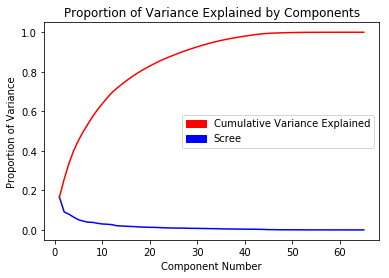

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
 
%matplotlib inline
pca=PCA()
 
featuresT=pca.fit_transform(X)
var_ratio=pca.explained_variance_ratio_
 
 
 
plt.plot(range(1,len(var_ratio)+1),var_ratio,c='b')
plt.xlabel("Component Number")
plt.ylabel("Proportion of Variance")
plt.title("Proportion of Variance Explained by Components")
cumSum=np.cumsum(var_ratio)
red_patch = mpatches.Patch(color='red', label='Cumulative Variance Explained')
blue_patch = mpatches.Patch(color='blue', label='Scree')
plt.legend(handles=[red_patch, blue_patch])
plt.plot(range(1,len(var_ratio)+1),cumSum,c='r')
plt.show()

### b).

In [6]:
import numpy as np
 
 
def printFeaturesNum(cumSum,ratio):
    print("Num PCs needed for ratio>= " + str(ratio) + ": " + str(np.argmax(cumSum>=ratio)+1))
   
printFeaturesNum(cumSum,.30)
printFeaturesNum(cumSum,.60)
printFeaturesNum(cumSum,.90)

Num PCs needed for ratio>= 0.3: 3
Num PCs needed for ratio>= 0.6: 9
Num PCs needed for ratio>= 0.9: 27


### c). 

In [8]:
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
 
 
 
def featuresPredict(cumSum,featuresT,y,ratio):
    reg=LinearRegression()
 
   
    reg.fit(featuresT[:,:np.argmax(cumSum>=ratio)+1],y)
    Y_predict=reg.predict(featuresT[:,:np.argmax(cumSum>=ratio)+1])
    rmse=(mean_squared_error(Y_predict,y))
    print("Mean squared error using "+str(np.argmax(cumSum>=ratio)+1)+" features: " + str(rmse))
 
featuresPredict(cumSum,featuresT,y,0.3)
featuresPredict(cumSum,featuresT,y,0.6)
featuresPredict(cumSum,featuresT,y,0.9)

Mean squared error using 3 features: 5120.60554779
Mean squared error using 9 features: 3942.78675143
Mean squared error using 27 features: 2857.425949
